# This is from the yelp academic dataset, using the reviews.json file

In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews_df = pd.read_json('yelp_academic_dataset_review.json',lines =True, nrows = 500000)

In [3]:
reviews_df.count()

review_id      500000
user_id        500000
business_id    500000
stars          500000
useful         500000
funny          500000
cool           500000
text           500000
date           500000
dtype: int64

In [4]:
reviews_df.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


### The columns review_id, user_id, and date wont be usefull for our analysis

In [5]:
cols_to_drop =["review_id", "user_id", "date"]
reviews_df.drop(cols_to_drop, inplace= True, axis=1)

In [6]:
reviews_df.head(10)

,business_id,stars,useful,funny,cool,text
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is..."
1,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...
2,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...
3,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo..."
4,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...
5,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...
6,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...
7,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...
8,B5XSoSG3SfvQGtKEGQ1tSQ,3,1,1,0,This easter instead of going to Lopez Lake we ...
9,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...


In [73]:
reviews_df.iloc[5]

business_id                               04UD14gamNjLY0IDYVhHJg
stars                                                          1
useful                                                         1
funny                                                          2
cool                                                           1
text           I am a long term frequent customer of this est...
Name: 5, dtype: object

### Checking if there are any duplicates in business_id's, or text

In [11]:
# Remove duplicate rows
dups = reviews_df[~reviews_df.duplicated(["text"])]
len(dups)

499229

In [16]:
feature_df = dups.drop(['stars','text', 'business_id'], axis=1)
label_df = dups['stars'].copy()

In [17]:
feature_df.count()

useful    499229
funny     499229
cool      499229
dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=123)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE: ', rmse)

RMSE:  1.797279758517516


Logistic Regression Confusion Matrix:


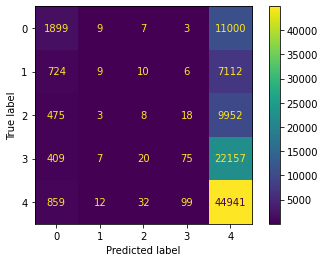

In [80]:
import matplotlib.pyplot as plt

print("Logistic Regression Confusion Matrix:")
lr_confuse = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_confuse, display_labels=lr.classes_)
disp.plot()
plt.show()

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeRegressor()
tree_score = cross_val_score(tree_model, feature_df, label_df, cv=5, scoring='neg_mean_squared_error')
tree_rmse = np.sqrt(-tree_score)

print("Root Mean: ", tree_rmse.mean())
print("Standard Deviation: ", tree_rmse.std())

Root Mean:  1.3517169172173031
Standard Deviation:  0.05302648685515068


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_scores = cross_val_score(rf_model, feature_df, label_df, cv=5, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores)

print("Root Mean: ", rf_rmse.mean())
print("Standard Deviation: ", rf_rmse.std())

Root Mean:  1.3500023261765985
Standard Deviation:  0.05234285957183482


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8],
}
rf_model_grid = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model_grid,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)

best_model_1 = grid_search.best_estimator_
y_pred = best_model_1.predict(x_test)
rmse_1 = mean_squared_error(y_test, y_pred, squared=False)

/home/mroohwee/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mroohwee/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mroohwee/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/home/mroohwee/.local/lib/python3.10/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/mroohwe

In [47]:
print("Best Parameters:", grid_search.best_params_)
print("RMSE:", rmse_1)

Best Parameters: {'max_features': 2, 'n_estimators': 30}
RMSE: 1.349170263404396


In [33]:
corr_matrix = dups.corr()
print(corr_matrix)

           stars    useful     funny      cool
stars   1.000000 -0.096827 -0.066332  0.073303
useful -0.096827  1.000000  0.516852  0.661129
funny  -0.066332  0.516852  1.000000  0.622521
cool    0.073303  0.661129  0.622521  1.000000


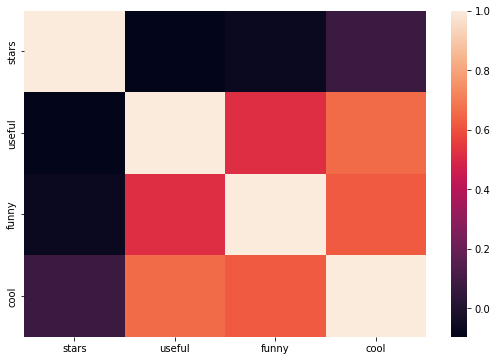

In [35]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix)
plt.show()

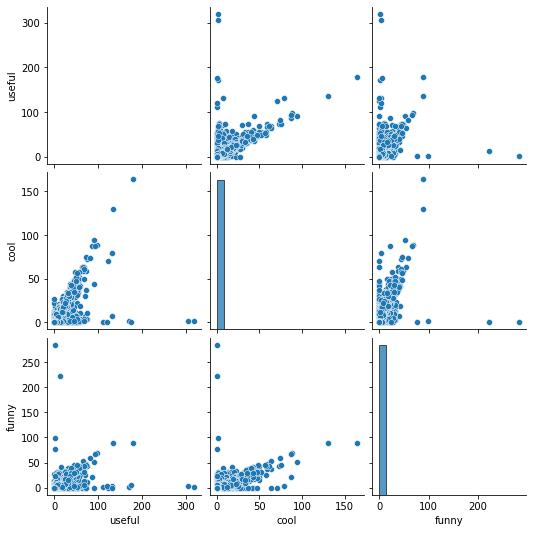

In [83]:
sorted_corr = corr_matrix['stars'].abs().sort_values(ascending=False)
top_corr = sorted_corr[1:4].index
sns.pairplot(dups[top_corr])

In [46]:
feature_import = grid_search.best_estimator_
features_df = pd.DataFrame({'Importance': feature_import})


RandomForestRegressor(max_features=2, n_estimators=30)

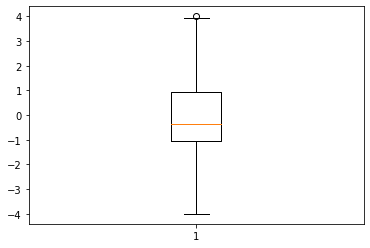

In [66]:
# Median is slightly lower than zero

difference = y_pred-y_test

plt.boxplot(difference)
plt.show()

In [72]:
a = [-1, 0.2, -0.3, 0.67]
mina = np.min(a)
maxa = np.max(a)

b = np.round(((a-mina)/(maxa - mina) * 4) + 1)
b

array([1., 4., 3., 5.])